In [1]:
# Read the ecommerce data provided to answer the following:

import numpy as np
import pandas as pd

df = pd.read_csv("Ecom_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394870 entries, 0 to 394869
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        394870 non-null  object
 1   customer_id        394870 non-null  int64 
 2   review_id          394870 non-null  object
 3   product_id         394870 non-null  object
 4   product_parent     394870 non-null  int64 
 5   product_title      394870 non-null  object
 6   product_category   394870 non-null  object
 7   star_rating        394870 non-null  int64 
 8   helpful_votes      394870 non-null  int64 
 9   total_votes        394870 non-null  int64 
 10  vine               394870 non-null  object
 11  verified_purchase  394870 non-null  object
 12  review_headline    394865 non-null  object
 13  review_body        394866 non-null  object
 14  review_date        394861 non-null  object
dtypes: int64(5), object(10)
memory usage: 45.2+ MB


<AxesSubplot:ylabel='star_rating'>

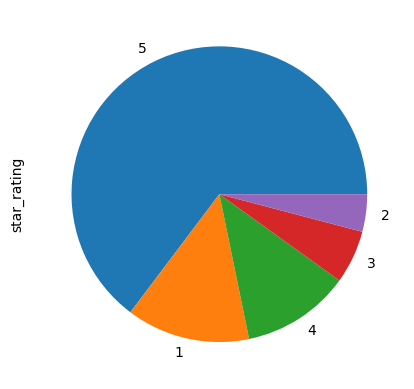

In [2]:
# 1. Analyze the distribution of star ratings in the given dataset.
df["star_rating"].value_counts().plot(kind="pie")

In [3]:
# 2. Identify the highest and lowest ratings given by the customers for each kind of product.
df.groupby("product_id")["star_rating"].agg([np.min, np.max]).reset_index()

,product_id,amin,amax
0,B0002CZPPG,1,5
1,B000AQ7K4I,4,5
2,B000JLNHO6,5,5
3,B000LGKQHU,1,5
4,B000YMNI2Q,1,5
...,...,...,...
12703,BT00DDC7CE,1,5
12704,BT00DDC88W,2,5
12705,BT00DDVMVQ,1,5
12706,BT00DDZD6G,1,5


In [4]:
# 3. Identify the customer who has rated maximum number of products, and the number of such products that they've rated.
# 4. How many users have rated atleast 50 products?
df.groupby("customer_id")["star_rating"].agg(["count"]).sort_values(by="count", ascending=False).reset_index().head(50)

,customer_id,count
0,21925455,95
1,40955995,92
2,23564949,83
3,14279279,74
4,52520442,73
5,51520185,66
6,20751317,54
7,25575022,49
8,11584162,49
9,50529050,49


In [27]:
# 5. Which is the most popular product?
starwise_df = pd.pivot_table(df, index="product_title", columns="star_rating", values="review_id", aggfunc="count").sort_values(by=[5, 4, 3, 2, 1], ascending=False).head(20)
starwise_df

star_rating,1,2,3,4,5
product_title,,,,,
Amazon.com eGift Cards,923.0,218.0,549.0,2015.0,33165.0
Playstation Network Card,845.0,72.0,139.0,502.0,11959.0
Amazon.com Gift Card in a Greeting Card (Various Designs),534.0,214.0,306.0,548.0,7742.0
Amazon.com Gift Cards - Print at Home,237.0,87.0,188.0,554.0,7333.0
Avast Free Antivirus 2015 [Download],565.0,164.0,296.0,1307.0,7130.0
Xbox Live Subscription,371.0,76.0,177.0,439.0,6200.0
Amazon eGift Card - Happy Birthday (Candles),161.0,48.0,127.0,381.0,5320.0
Amazon eGift Card - Smile,230.0,96.0,162.0,354.0,4192.0
Playstation Plus Subscription,238.0,56.0,96.0,278.0,4009.0


In [6]:
# 6. How many products in the given data have received more than 6500 ratings?
df.groupby("product_id").agg({"star_rating": "count"}).sort_values(by="star_rating", ascending=False).query(""" star_rating >= 6500 """)

,star_rating
product_id,
B004LLIKVU,28705
B00H9A60O4,9462


In [12]:
# 7. How many unverified purchases have been flagged for each product category?
# What has been the rating given for such purchases on an average?
df.pivot_table(index="product_category", columns="verified_purchase", values="star_rating", aggfunc=np.mean)

verified_purchase,N,Y
product_category,,
Digital_Software,3.531746,3.543151
Digital_Video_Games,3.433169,3.923878
Gift Card,4.578143,4.746077


<AxesSubplot:>

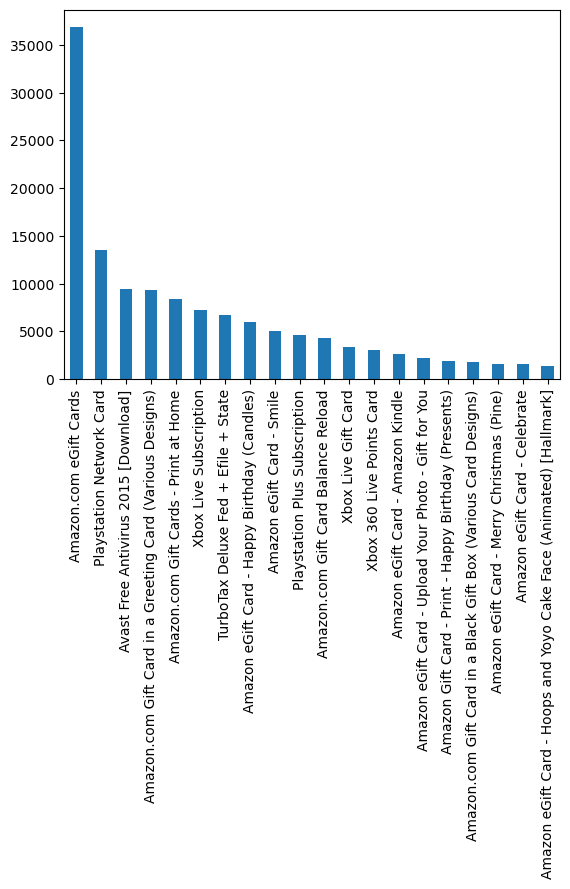

In [37]:
# 8. Visualize the top 20 most popular products as per the given data.
df[[i in starwise_df.index.values for i in df["product_title"]]]["product_title"].value_counts().plot.bar()

In [ ]:
# 9. Extract the product titles with the product parent ID-106182406.
# 10. How many product reviews were recorded on the date 2015-08-31?